In [1]:
################################################################################
#######################    Time series decomposition    ########################
################################################################################
# For more information, check https://www.machinelearningplus.com/time-series/time-series-analysis-python/ 
### Load necessary modules -------------------------------
from dateutil.parser import parse 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
plt.style.use('ggplot')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import ForecastingTools as FT

In [2]:
# Import data
df = pd.read_excel('ARMA_series.xls')
df.head()

,y1,y2,y3,y4,y5,y6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.153085,-0.716578,-1.714427,0.000000,1.672241,-0.491550
2,-0.407418,-0.388769,0.065251,1.450110,-0.256682,1.600353
3,0.038315,0.393303,0.508671,1.845359,-0.099479,-0.524670
4,-0.055686,-1.399870,-0.237498,4.164812,-1.090444,0.319794


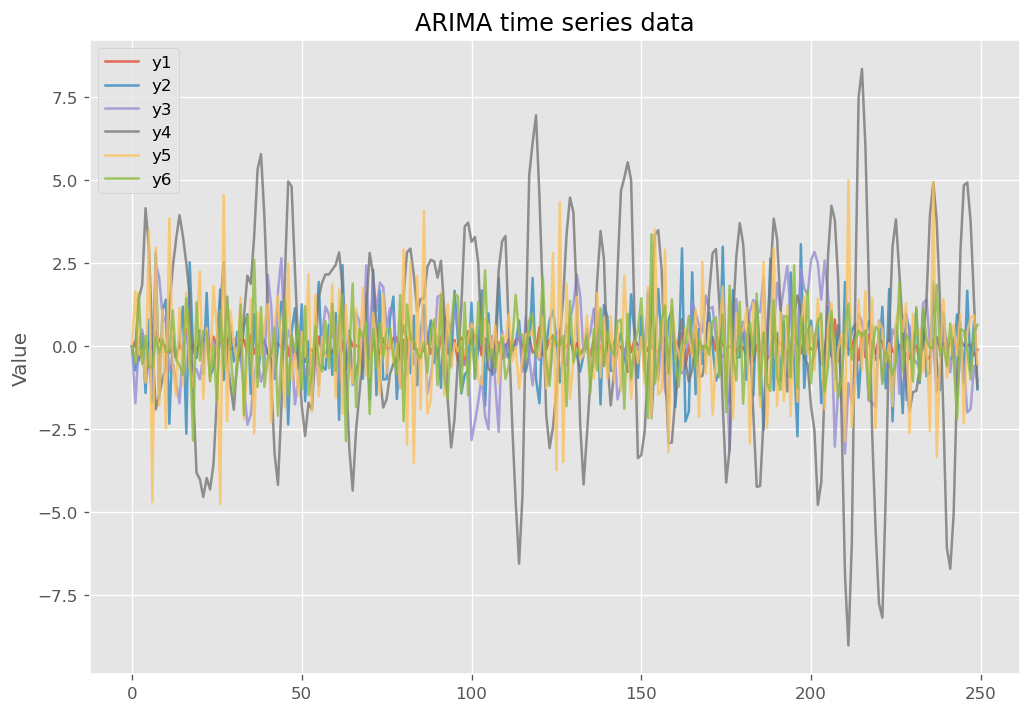

In [3]:
# Plotting a time series
fig, ax = plt.subplots()
for col in df.columns.values.tolist():
    ax.plot(col, data=df, label=col, alpha=0.8)
ax.set(title='ARIMA time series data', ylabel='Value')
plt.legend()
plt.show()

In [4]:
df_ts = df[['y1']] # Maintain data.frame format for column
df_ts

,y1
0,0.000000
1,0.153085
2,-0.407418
3,0.038315
4,-0.055686
...,...
245,0.020973
246,0.022484
247,0.058784
248,-0.275104


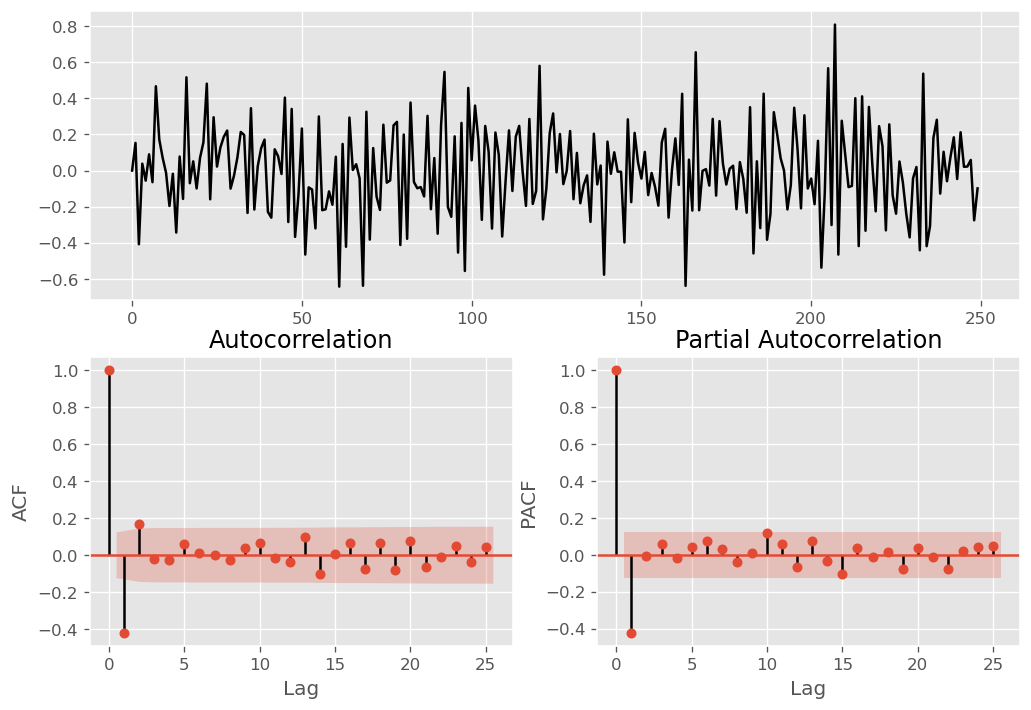

In [5]:
## Identification frocess 
# ACF and PACF of the time series -> identify significant lags and order
FT.ts_display(df_ts)

In [6]:
# Fit model with estimated order
arima_fit = ARIMA(df_ts, order=(1,0,1)).fit(disp=0)
print(arima_fit.summary())

ARMA Model Results                              
Dep. Variable:                     y1   No. Observations:                  250
Model:                     ARMA(1, 1)   Log Likelihood                   9.995
Method:                       css-mle   S.D. of innovations              0.232
Date:                Mon, 24 Aug 2020   AIC                            -11.990
Time:                        18:16:25   BIC                              2.095
Sample:                             0   HQIC                            -6.321
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.010     -0.176      0.860      -0.022       0.018
ar.L1.y1      -0.4075      0.125     -3.256      0.001      -0.653      -0.162
ma.L1.y1      -0.0119      0.134     -0.089      0.929      -0.275       0.251
   

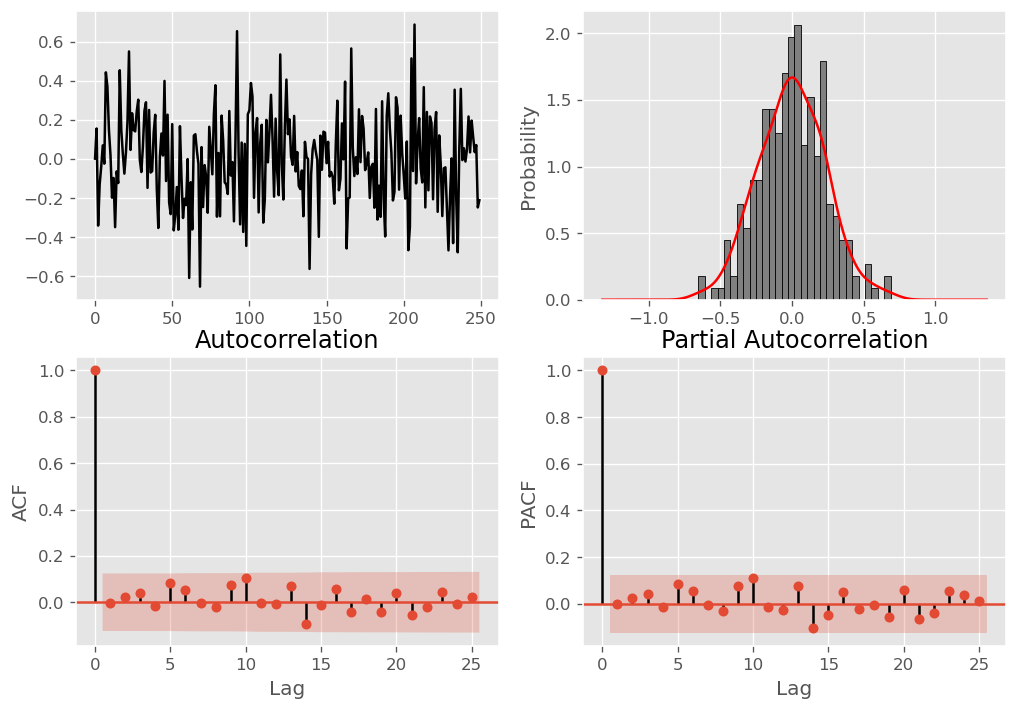

In [7]:
# Plot residual error
FT.check_residuals(pd.DataFrame(arima_fit.resid))

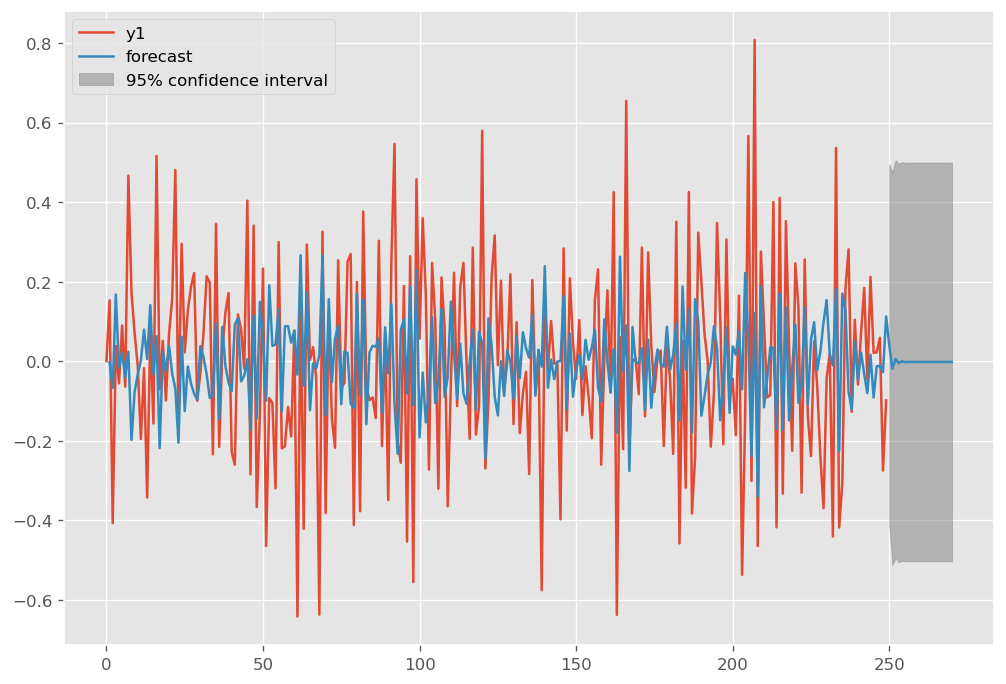

In [9]:
# Plot prediction and confidence intervals
# If using dynamic = True, the forecast are used as real data 
horizon = 20
fig, ax = plt.subplots()
ax = df_ts.loc[0:].plot(ax=ax)
fig = arima_fit.plot_predict(1, df_ts.shape[0] + horizon, 
                        dynamic=False, ax=ax,
                        plot_insample=False)
plt.show()